# AE4320 Assigment: Neural Networks
## Part 3: Radial Basis Function Neural Network Model
Author: José Cunha (5216087)

In [1]:
import torch
import numpy as np
import pickle

from read_data import treat_data
from rbf import RBFNet
from rbf_lm import RBFNet as RBFLM
from rbf_lm  import Linear, RBFLayer, Net

In [2]:
ols_data = np.loadtxt('data/output.csv', delimiter=',')  # load full reconstructed data
Y, X = ols_data[:, 0], ols_data[:, 1:]  # Y = Cm,  X = [alpha, beta, V]
Y, X = treat_data((Y, X))  # treat data by removing outliers

Use Kmeans clustering to find the RBF centers, for the linear regression approach (e.g. 15 RBFs)

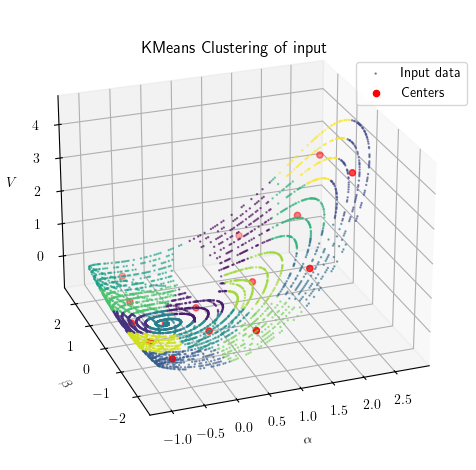

In [3]:
net = RBFNet(X, Y, 15, 1)
_ = net.get_centers(net.X_train_tensor, plot=True) # get RBF centers

Train radial basis function neural network using a linear regression approach

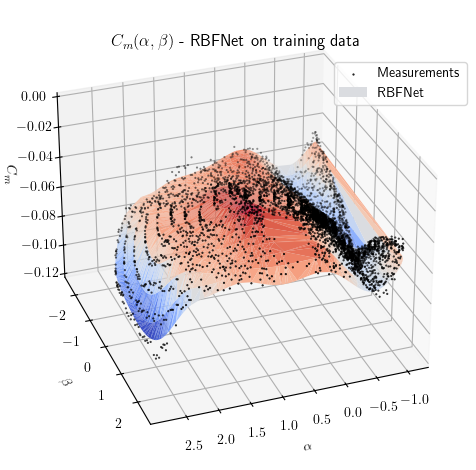

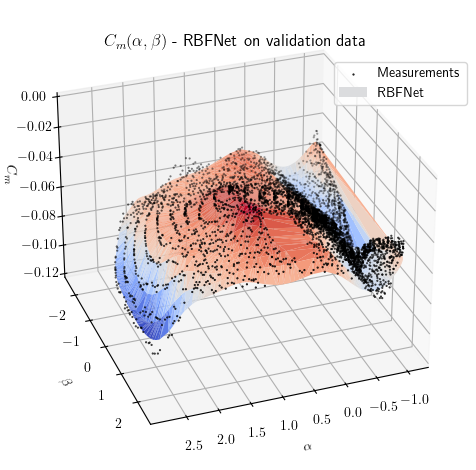

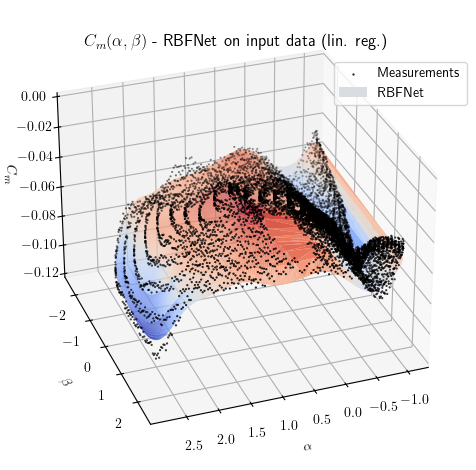

In [4]:
rbf = RBFNet(X, Y, 50, 2.05)  # initialize object
rbf.train_lin_reg()  # 'train' the RBF network
rbf.plot_lin_reg()  # plot results

Optimize the linear regression RBFNet by tuning the RBF amplitude parameter

RBF amplitude: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:28<00:00, 21.40it/s]


Minimum amplitude: 2.05


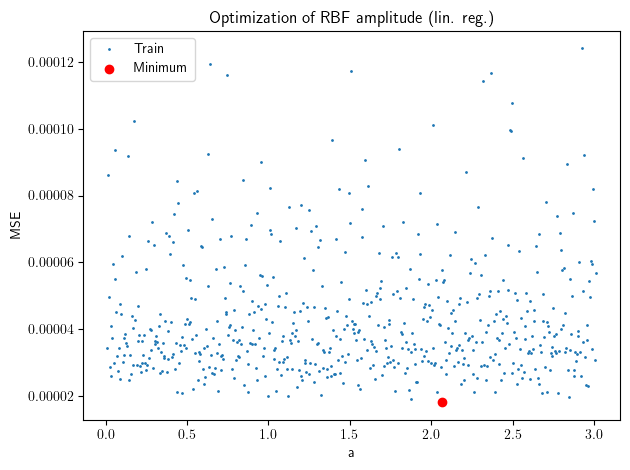

In [5]:
RBFNet.optimize_lin_reg(X, Y)

Train the RBF neural network using the Levenberg-Marquardt learning algorithm

Epochs: 100 epoch [00:17,  5.76 epoch/s]


Failed to converge,  loss=0.981355, trying again ...


Epochs: 91 epoch [00:16,  5.44 epoch/s]


Failed to converge,  loss=0.398002, trying again ...


Epochs: 65 epoch [00:11,  5.58 epoch/s]


Failed to converge,  loss=2.221075, trying again ...


Epochs: 255 epoch [00:44,  5.71 epoch/s]


Failed to converge,  loss=0.697030, trying again ...


Epochs: 294 epoch [00:55,  5.29 epoch/s]


Final Loss (RSS/MSE): 0.149992/0.000031 at epoch 294


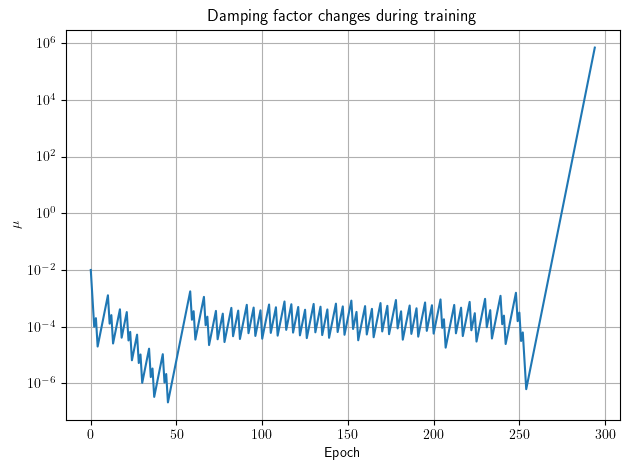

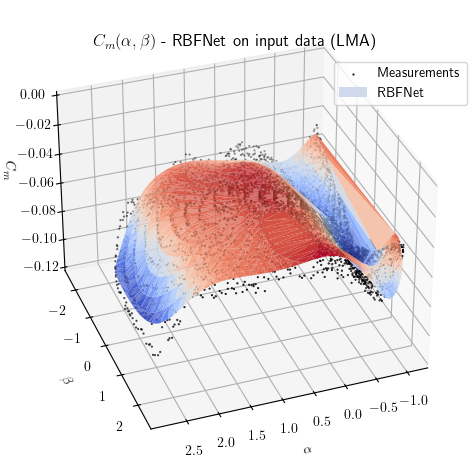

In [6]:
# initialize network with 30 RBFs and full inputs for training
rbf = RBFLM(X, Y, 30, 500, 0.01, 0.3, retry=True, filename='data/rbf_lm_testing.pkl', input_dim=3)
rbf.train_lm()  # train RBF network with Levenberg-Marquardt learning algorithm
net = pickle.load(open('data/rbf_lm_testing.pkl', 'rb')) # load in the stored network
net.show_mu_dynamics() # plot the changes in damping  factor  during training
RBFLM.plot_lm('', net) # plot the output estimate of the network

Demonstrate influence of damping factor on network convergence

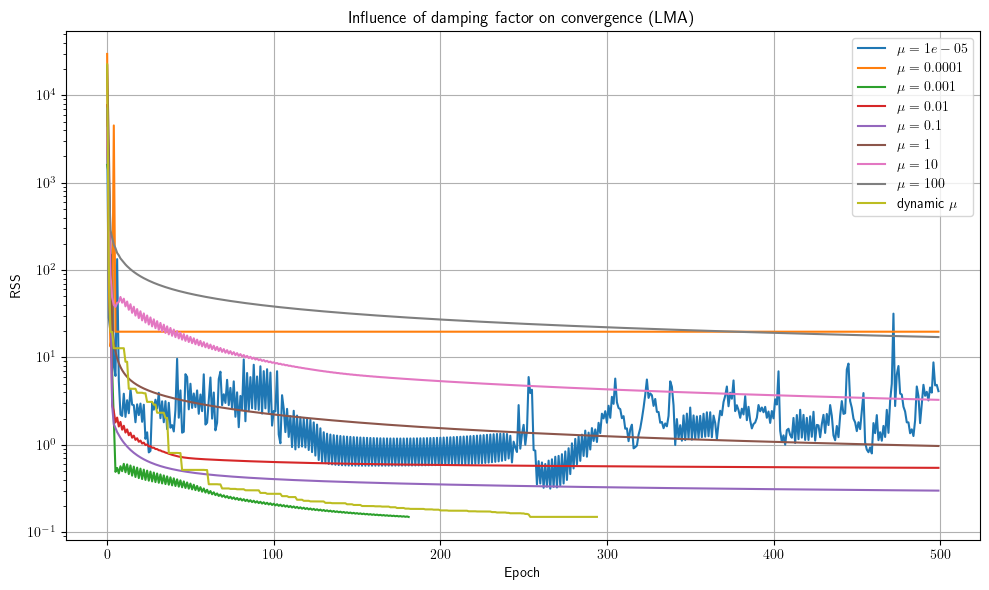

In [7]:
RBFLM.damping_effect(X, Y, plot=True)

Demonstrate the sensitivity to initial conditions of the RBF network trained on the LMA

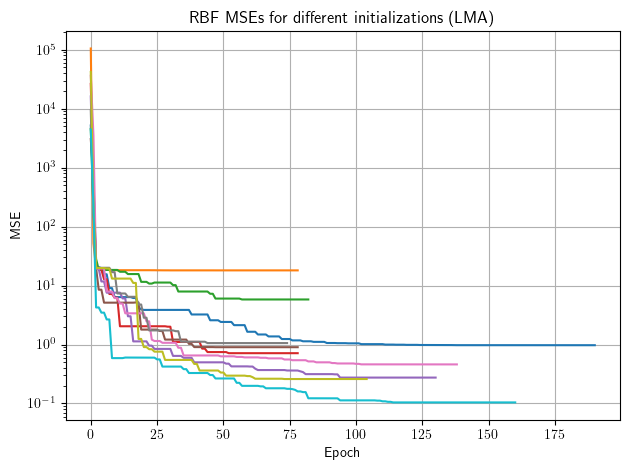

In [8]:
RBFLM.check_init_conditions(X, Y, plot=True)

Optimize the number of hidden neurons in the RBF network to get the best tradeoff between model accuracy and complexity

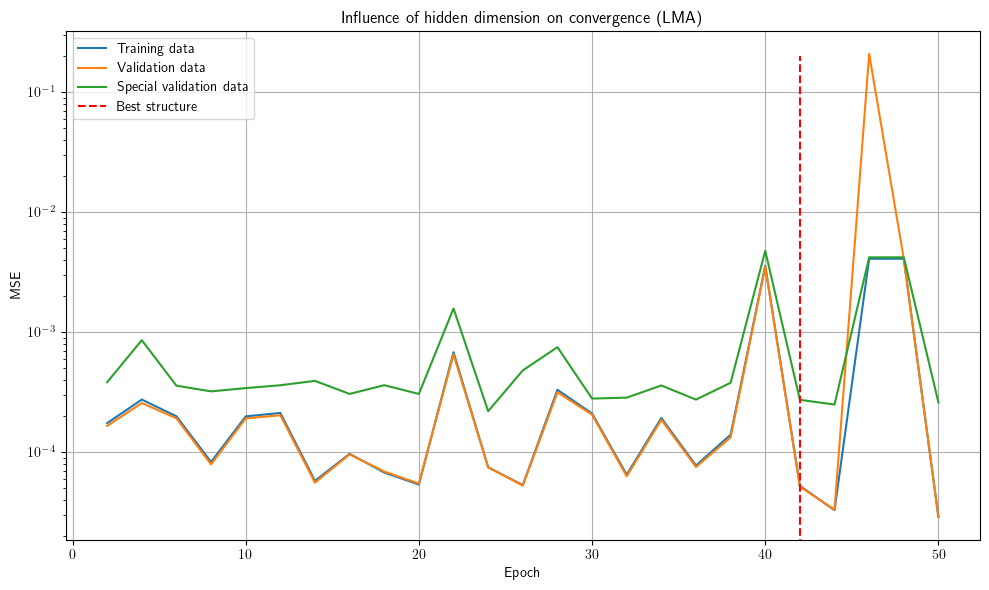

In [9]:
RBFLM.optimize_structure(X, Y, plot=True)

Show the results of the network when the input is the special validation set, and show the residual RMS.

42 0.007210148
The residual RMS of the RBF model of hidden dimension 42 is: 0.0165


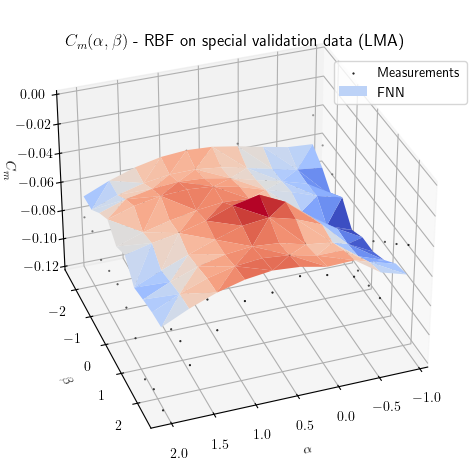

In [15]:
RBFLM.plot_special()